In [9]:
import pandas as pd
from utils import *
from plotting import *

import ms_entropy as mse 

In [10]:
entropy_scores = pd.read_csv("../data/output_matching/entropy/entropy_tol_0.0035da.tsv", sep="\t")
entropy_scores = append_classes(entropy_scores, "query")

In [11]:
larger_superclasses = entropy_scores.groupby("superclass").filter(lambda x: len(x) > 2)

/m2b/home/hechth/git/recetox/ei_spectra_predictions/analysis/Python_scripts/plotting.py:267: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels, rotation=45, ha=ha)


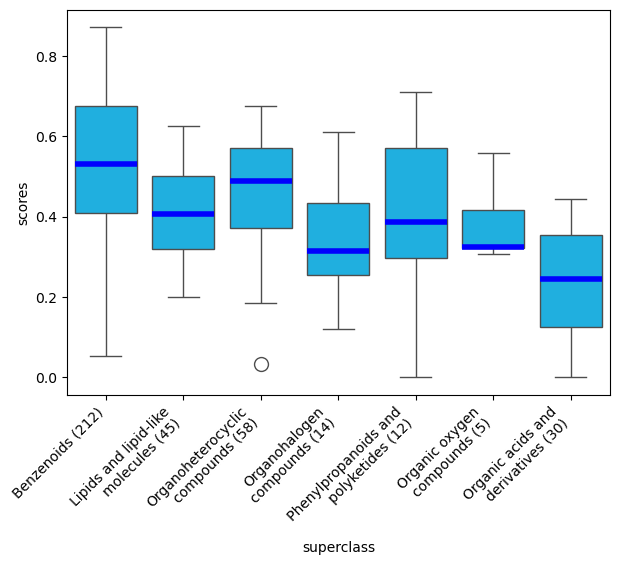

In [12]:
order = [
    "Benzenoids",
    "Lipids and lipid-like molecules",
    "Organoheterocyclic compounds",
    "Organohalogen compounds",
    "Phenylpropanoids and polyketides",
    "Organic oxygen compounds",
    "Organic acids and derivatives"
]

x = "superclass"
y = 'scores'

make_simple_boxplot(larger_superclasses, x, y, order=order).show()

In [13]:
matchms_scores = load_matchms_scores()

In [14]:
merged = entropy_scores.set_index(["query", "reference"]).join(matchms_scores.set_index(["query", "reference"]), lsuffix='_entropy', rsuffix='_matchms').reset_index()
results = merged[["query", "reference", "scores_entropy", "scores_matchms", "matches"]]


In [15]:
# Assuming `df` is your DataFrame
corr = results[["scores_entropy", "scores_matchms", "matches"]].corr().round(2)